In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

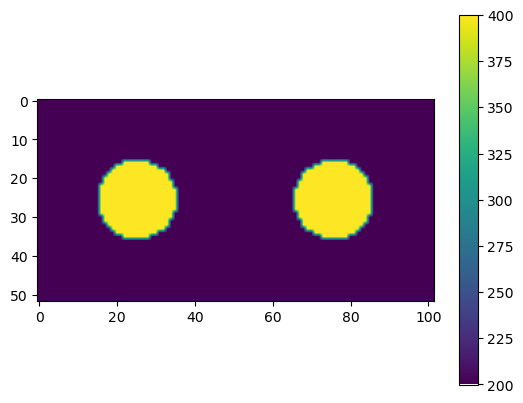

In [2]:
Nx = 100
Ny = 50
Lx = 2.0
Ly = 1.0
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)
Tf = 2.6
ht = min(0.5*hx*hx,0.5*hy*hy)*0.9
Nt = int(Tf/ht)
T = np.zeros((Ny+2,Nx+2,Nt+1))
alpha = 15.0e-4
sx = alpha*ht / hx / hx
sy = alpha*ht / hy  / hy 
for j in range(0,Ny+2):
    for i in range(0,Nx+2):
        xi, yi = i*hx, j*hy
        T[j,i,0] = 200.0
        if ((xi-0.5)**2+(yi-0.5)**2< 0.2*0.2) or ((xi-1.5)**2+(yi-0.5)**2< 0.2*0.2):
            T[j,i,0] = 400.0
plt.imshow(T[:,:, 0],interpolation = 'bilinear')
plt.colorbar()


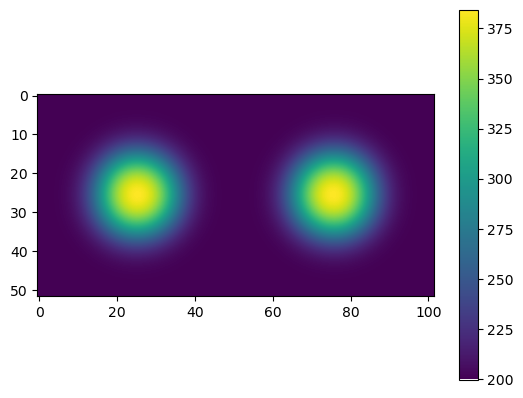

In [3]:
for n in range(Nt):
    T[0,:,n+1] = 200.0
    T[Ny+1,:,n+1] = 200.0
    T[:,0,n+1] = 200.0
    T[:,Nx+1,n+1] = 200.0
    for j in range(1,Ny+1):
        for i in range(1,Nx+1):
            T[j,i,n+1] = sx*T[j,i+1,n] + sx*T[j,i-1,n] + sy*T[j+1,i,n] + sy*T[j-1,i,n] + (1-2*sx-2*sy)*T[j,i,n]
plt.imshow(T[:,:,-1],interpolation = 'bilinear')
plt.colorbar()

In [4]:
im = Image.open("Nome.png")
p = np.array(im)

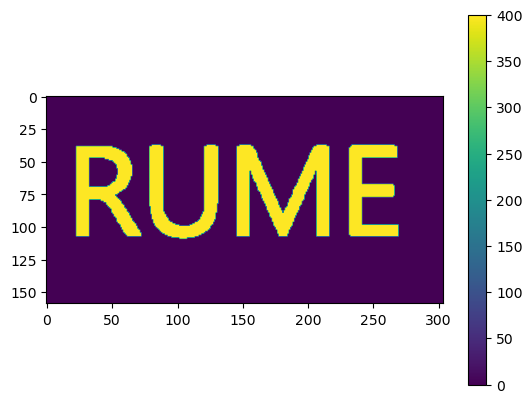

In [5]:
Nx = len(p[0])
Ny = len(p)

Lx = 14.0
Ly = 7.0

hx = Lx / (Nx+1)
hy = Ly / (Ny+1)

Tf = 2.6
ht = min(0.5*hx*hx, 0.5*hy*hy)*0.9
Nt = int(Tf/ht)

T = np.zeros((Ny+2, Nx+2, Nt+1))
alpha = 15.0e-4

sx = alpha*ht / hx / hx
sy = alpha*ht / hy  / hy 

#initial Condition:
for j in range(0, Ny):
    for i in range(0, Nx):
        xi, yj = i * hx, j*hy
        T[j, i, 0] = 0
        if (p[j, i, 0] != 255):
            T[j, i, 0] = 400.0
            
plt.imshow(T[:, :, 0], interpolation='bilinear')
plt.colorbar()


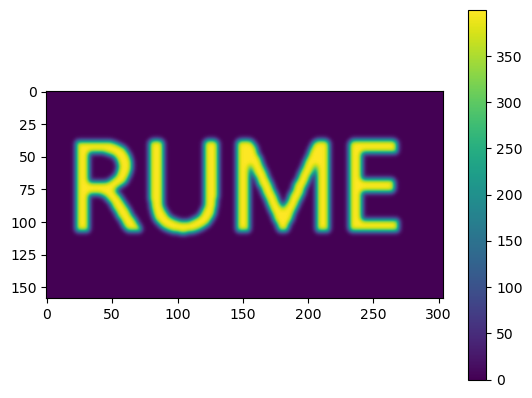

In [6]:
for n in range(Nt):
    T[0,:,n+1] = 0
    T[Ny+1,:,n+1] = 0
    T[:,0,n+1] = 0
    T[:,Nx+1,n+1] = 0
    for j in range(1,Ny+1):
        for i in range(1,Nx+1):
            T[j,i,n+1] = sx*T[j,i+1,n] + sx*T[j,i-1,n] + sy*T[j+1,i,n] + sy*T[j-1,i,n] + (1-2*sx-2*sy)*T[j,i,n]
plt.imshow(T[:,:,Nt],interpolation = 'bilinear')
plt.colorbar()